# Fonction principale

In [108]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

#Définition des constante gravitationnelle utiles :
G = 6.674*10**(-11) #Constante gravitationelle 
c = 3*10**8 #Célérité de la lumière dans le vide (m.s^-1)

theta = np.linspace(0, 2*np.pi, 100)

#Constante liées aux planètes :

#Soleil :
Rs = 6.957*10**8 #Rayon du soleil (m)
Ms = 1.9885*10**30 #Masse solaire (kg)
Sx = Rs*np.cos(theta)
Sy = Rs*np.sin(theta)


# Terre :
Rt = 6.371e6       # Rayon de la Terre (m)
Mt = 5.972e24      # Masse de la Terre (kg)
d_soleil_terre = 1.496e11  # Distance Soleil-Terre (m)
Tx = d_soleil_terre * np.cos(theta)
Ty = d_soleil_terre * np.sin(theta)

# Mercure :
Rmercure = 2.4397e6   # Rayon (m)
Mmercure = 3.3011e23  # Masse (kg)
d_soleil_mercure = 5.791e10  # Distance Soleil-Mercure (m)
Mx_mercure = d_soleil_mercure * np.cos(theta)
My_mercure = d_soleil_mercure * np.sin(theta)

# Vénus :
Rvenus = 6.0518e6     # Rayon (m)
Mvenus = 4.8675e24    # Masse (kg)
d_soleil_venus = 1.082e11  # Distance Soleil-Vénus (m)
Vx = d_soleil_venus * np.cos(theta)
Vy = d_soleil_venus * np.sin(theta)

# Mars :
Rmars = 3.3895e6      # Rayon (m)
Mmars = 6.4171e23     # Masse (kg)
d_soleil_mars = 2.279e11  # Distance Soleil-Mars (m)
Mx_mars = d_soleil_mars * np.cos(theta)
My_mars = d_soleil_mars * np.sin(theta)

# Jupiter :
Rjupiter = 6.9911e7   # Rayon (m)
Mjupiter = 1.8982e27  # Masse (kg)
d_soleil_jupiter = 7.785e11  # Distance Soleil-Jupiter (m)
Jx = d_soleil_jupiter * np.cos(theta)
Jy = d_soleil_jupiter * np.sin(theta)

# Saturne :
Rsaturne = 5.8232e7   # Rayon (m)
Msaturne = 5.6834e26  # Masse (kg)
d_soleil_saturne = 1.433e12  # Distance Soleil-Saturne (m)
Sx_saturne = d_soleil_saturne * np.cos(theta)
Sy_saturne = d_soleil_saturne * np.sin(theta)

# Uranus :
Ruranus = 2.5362e7    # Rayon (m)
Muranus = 8.6810e25   # Masse (kg)
d_soleil_uranus = 2.877e12  # Distance Soleil-Uranus (m)
Ux = d_soleil_uranus * np.cos(theta)
Uy = d_soleil_uranus * np.sin(theta)

# Neptune :
Rneptune = 2.4622e7   # Rayon (m)
Mneptune = 1.02413e26 # Masse (kg)
d_soleil_neptune = 4.503e12  # Distance Soleil-Neptune (m)
Nx = d_soleil_neptune * np.cos(theta)
Ny = d_soleil_neptune * np.sin(theta)


planetes = ["Mercure", "Vénus", "Terre", "Mars", "Jupiter", "Saturne", "Uranus", "Neptune"]
# Dictionnaire des distances Soleil-Planètes (en mètres)
distances_soleil_planetes = {
    "Mercure": d_soleil_mercure,
    "Vénus": d_soleil_venus,
    "Terre": d_soleil_terre,
    "Mars": d_soleil_mars,
    "Jupiter": d_soleil_jupiter,
    "Saturne": d_soleil_saturne,
    "Uranus": d_soleil_uranus,
    "Neptune": d_soleil_neptune
}


#Unité astronomique (m)
UA = 149597870700
#Puissannce lumineuse
E = 3.6*10**(26)




In [109]:
#fonction définissant l'intensité lumineuse arrivant sur la voile pour une distance prédéfinie voile-source lumineuse
#S: surface de la voile
#r: distance voile- source lumineuse
#phi: angle d'inclinaison de la voile
def intensite(Surface,r,phi):
    angle = phi 
    return (2*Surface*E*np.cos(angle)**2)*(1/(4*np.pi*c*(r**2)))

In [112]:
#Programme de base résolvant les trajectoires :
#fx, fy : deux composantes de la force supplémentaire
#A = G*M masse du corps
#CI : list avec condition initiale sous la forme [xi, yi, vxi, vyi] 
#T : temps d'intégration (intialisé à 100 min par défaut)
#gravite : Option de plot 
#plotGraphe : Option de plot de graphe (x, y)+ Trajectoire dans le plan (Oxy) True par défaut
def Resolution_Trajectoire( fx, fy, CI, T = 6000, A=0, RayonPlaneteOrbite=0, systeme_solaire =0,plotGraphe = True, periode = False): 
    def model(Z,t):
        x, y, vx, vy = Z
        f = fx(x, y, vx, vy, t)
        g = fy(x, y, vx, vy, t)
        dxdt = vx
        dydt = vy
        if A != 0 and RayonPlaneteOrbite != 0:
            dvxdt = -(A*x)/(x**2 + y**2)**(3/2) + f
            dvydt = -(A*y)/(x**2 + y**2)**(3/2) + g 
        else:
            dvxdt = f
            dvydt = g             
        return [dxdt, dydt, dvxdt, dvydt]
    temps = np.linspace(0, T, 1000) #Création array temps
    #Calcul de la trajectoire :
    Trajectoire = odeint(model, CI, temps)
    #Récupération des données (x, y, vx, vy)
    x, y, vx, vy = Trajectoire.T[0], Trajectoire.T[1], Trajectoire.T[2], Trajectoire.T[3]
    if plotGraphe == True:
        #Graphe de x(t), y(t)
        fig1 = plt.figure()
        plt.plot(temps, x, label = r'$x(t)$')
        plt.plot(temps, y, label = r'$y(t)$')
        plt.legend()
        plt.grid()
        plt.show()
        #Graphe de la trajectoire y = f(x)
        fig2 = plt.figure()
        plt.plot(x, y, label = 'Trajectoire', color = 'purple')
        if A != 0 and RayonPlaneteOrbite != 0:
        #Coordonnées de la surface du corps :
            theta = np.linspace(0, 2*np.pi, 100)
            Tracex = RayonPlaneteOrbite*np.cos(theta)
            Tracey = RayonPlaneteOrbite*np.sin(theta)
            if systeme_solaire==0:
            #Tracé de l'objet autour duquel il orbite 
                plt.plot(Tracex, Tracey, color = 'green', label = "Surface du corps")
        if systeme_solaire != 0:
        #Tracé de l'objet autour duquel il orbite 
            # Soleil
            plt.plot(Sx, Sy, color='gold', label="Soleil")
            for planete in planetes[:systeme_solaire]:
                plt.plot(distances_soleil_planetes[planete]*np.cos(theta), distances_soleil_planetes[planete]*np.sin(theta), label = planete)

        plt.xlabel(r'$x$ $(m)$')
        plt.ylabel(r'$y$ $(m)$')
        plt.grid()
        plt.legend(loc = 'upper right')
        plt.show()
    if periode:
        y = Trajectoire.T[1]
        min = np.abs(y[1])
        i = 1
        while(np.abs(y[i+1])>min):
            i = i+1
        print('Période T = ', 2*temps[i], 's, soit ', 2*temps[i]/60, 'min', 'ou encore ', 2*temps[i]/3600, 'heures')
    return (x, y, vx, vy)        

# Première partie: étalonnage du code

## Vitesse initiale orthoradiale

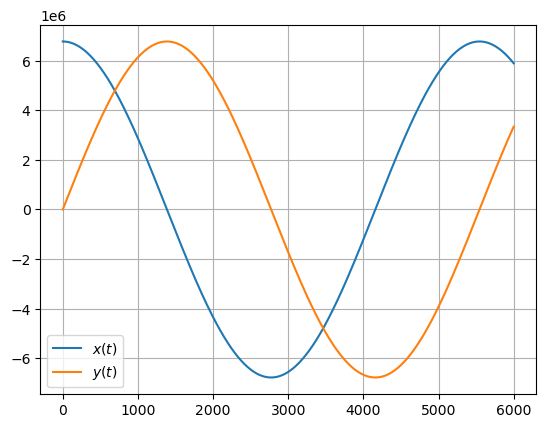

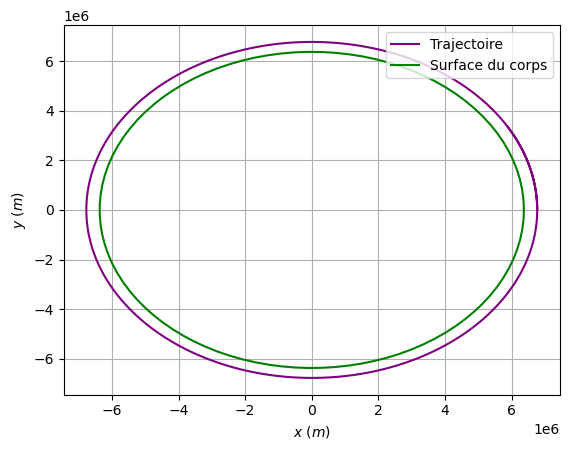

Période T =  5525.525525525525 s, soit  92.09209209209209 min ou encore  1.534868201534868 heures


In [121]:
#Cas où (fx, fy)=(0, 0), rotation autour de la Terre vitesse intiale orthoradiale :
#(On supposera la voile en x=h+Rt à t=0, et donc vi selon uy)

#Définition des paramètres de la trajectoire :
h = 400*10**3  #Hauteur initiale
At = G*Mt 
vi = np.sqrt(G*Mt/(Rt+h))
CI = [Rt+h, 0, 0, vi]

#Définition des force externes :
def fx(x, y, vx, vy, t):
    return 0
def fy(x, y, vx, vy, t):
    return 0

#Calcul de la trajectoire :
Circulaire_Terre = Resolution_Trajectoire( fx, fy, CI,A=At, RayonPlaneteOrbite=Rt,  periode = True)

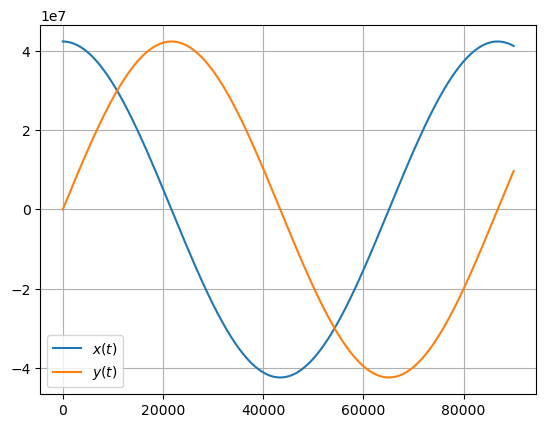

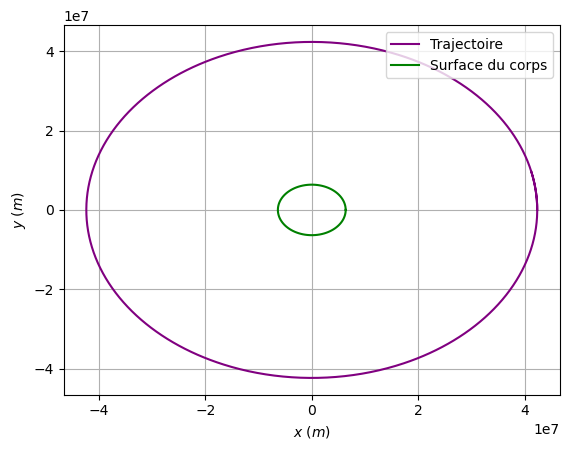

Période T =  86486.48648648648 s, soit  1441.4414414414414 min ou encore  24.024024024024023 heures
Vitesse initiale :  3067.0343763111014


In [122]:
#Cas où (fx, fy)=(0, 0), rotation autour de la Terre vitesse intiale orthoradiale :
#Orbite géostationnaire

#Définition des paramètres de la trajectoire :
h = 36000*10**3  #Hauteur initiale
At = G*Mt 
vi = np.sqrt(G*Mt/(Rt+h))
CI = [Rt+h, 0, 0, vi]

#Définition des force externes :
def fx(x, y, vx, vy, t):
    return 0
def fy(x, y, vx, vy, t):
    return 0

#Calcul de la trajectoire :
Geost = Resolution_Trajectoire( fx, fy, CI, T = 25*3600, A=At, RayonPlaneteOrbite=Rt, periode = True)
print('Vitesse initiale : ', vi)

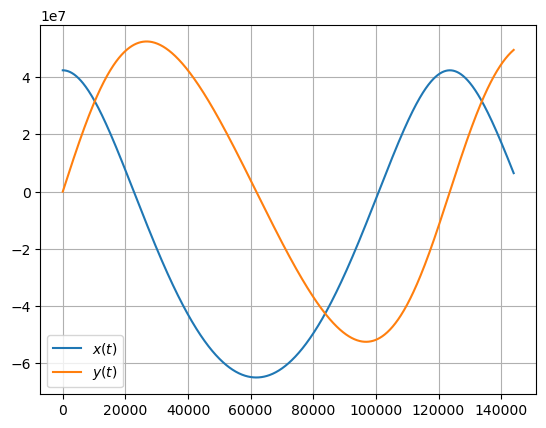

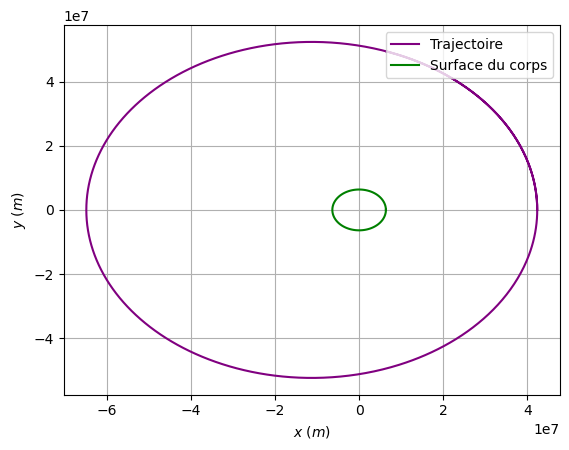

Période T =  123099.0990990991 s, soit  2051.6516516516517 min ou encore  34.194194194194196 heures


In [123]:
#Trajectoire elliptique :
#Cas où (fx, fy)=(0, 0), rotation autour de la Terre vitesse intiale orthoradiale :
#Orbite géostationnaire

#Définition des paramètres de la trajectoire :
h = 36000*10**3  #Hauteur initiale
At = G*Mt 
vi = 1.1*np.sqrt(G*Mt/(Rt+h))
CI = [Rt+h, 0, 0, vi]

#Définition des force externes :
def fx(x, y, vx, vy, t):
    return 0
def fy(x, y, vx, vy, t):
    return 0

#Calcul de la trajectoire :
Geost = Resolution_Trajectoire( fx, fy, CI, T = 40*3600,A=At, RayonPlaneteOrbite=Rt,  periode = True)

Vitesse initiale :  3067.0343763111014
vitesse critique min (Terre touchée) 1568.1310690847974 vitesse critique max(Terre pas touchée) 1568.1369189886218


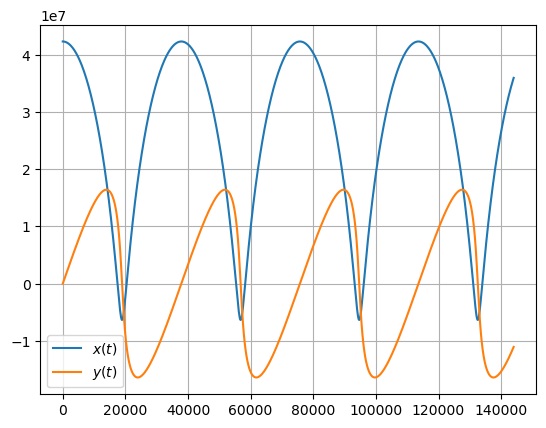

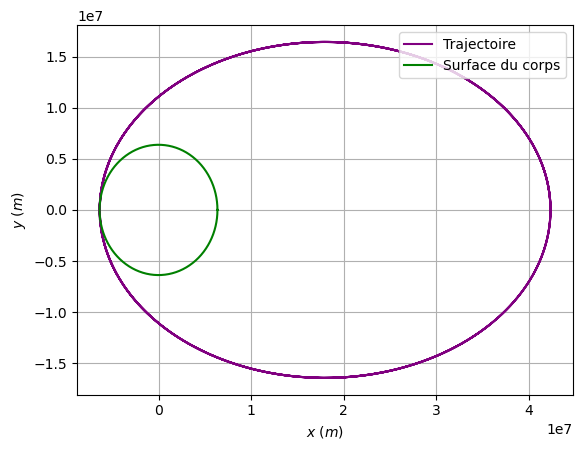

In [124]:
#Trajectoire elliptique : vitesse critique de frappe
#Cas où (fx, fy)=(0, 0), rotation autour de la Terre vitesse intiale orthoradiale :
#Orbite géostationnaire intiale

#Définition des paramètres de la trajectoire :
h = 36000*10**3  #Hauteur initiale
At = G*Mt
vi = np.sqrt(G*Mt/(Rt+h))
CI = [Rt+h, 0, 0, vi]
print('Vitesse initiale : ', vi)


#Définition des force externes :
def fx(x, y, vx, vy, t):
    return 0
def fy(x, y, vx, vy, t):
    return 0

#Dichotométrie afin de trouver la vitesse à laquelle le satellite touche la Terre
k = 0.01
CI = [Rt+h, 0, 0, vi]
TrajectoireCritique = Resolution_Trajectoire( fx, fy, CI, T = 40*3600,A=At, RayonPlaneteOrbite=Rt,  plotGraphe = False,periode = False)
v_min = 0
v_max = vi
while np.abs(v_max-v_min)> k:
    v = (v_max + v_min) / 2
    CI = [Rt+h, 0, 0, v]
    TrajectoireCritique = Resolution_Trajectoire(fx, fy, CI, T = 40*3600, A=At, RayonPlaneteOrbite=Rt, plotGraphe = False,periode = False)
    if np.sqrt(np.min(TrajectoireCritique[0]**2+TrajectoireCritique[1]**2)) > Rt:
        v_max = v
    else:
        v_min = v
print('vitesse critique min (Terre touchée)', v_min,'vitesse critique max(Terre pas touchée)', v_max)
CI = [Rt+h, 0, 0, v_min]
TrajectoireCritique = Resolution_Trajectoire(fx, fy, CI, T = 40*3600,A=At, RayonPlaneteOrbite=Rt,  plotGraphe = True,periode = False)



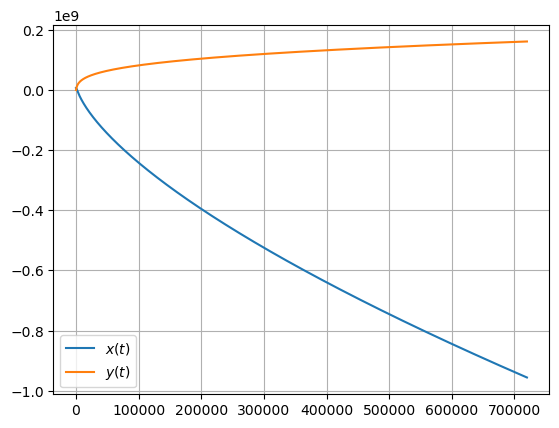

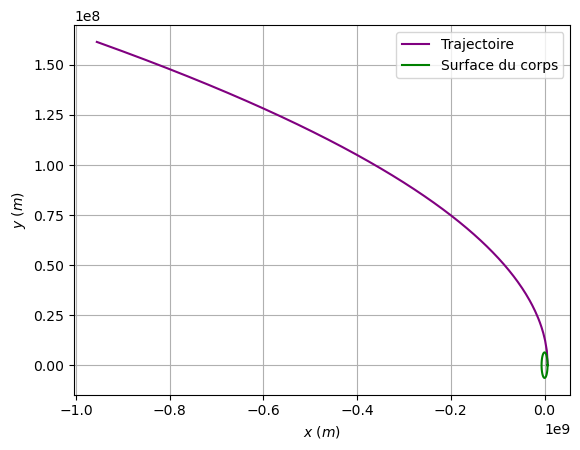

Vitesse de libération :  10850.296138970241


In [125]:
#Trajectoire elliptique : 
#Cas où (fx, fy)=(0, 0), rotation autour de la Terre vitesse intiale orthoradiale :
#Orbite géostationnaire intiale

#Définition des paramètres de la trajectoire :
h = 400*10**3  #Hauteur initiale
At = G*Mt
vi = np.sqrt(2*G*Mt/(Rt+h))
CI = [Rt+h, 0, 0, vi]

#Définition des force externes :
def fx(x, y, vx, vy, t):
    return 0
def fy(x, y, vx, vy, t):
    return 0

#Calcul de la trajectoire :
TrajectoireCritique = Resolution_Trajectoire( fx, fy, CI, T = 200*3600,A=At, RayonPlaneteOrbite=Rt )
print('Vitesse de libération : ', vi)

## Force externes, vitesse orthoradiale

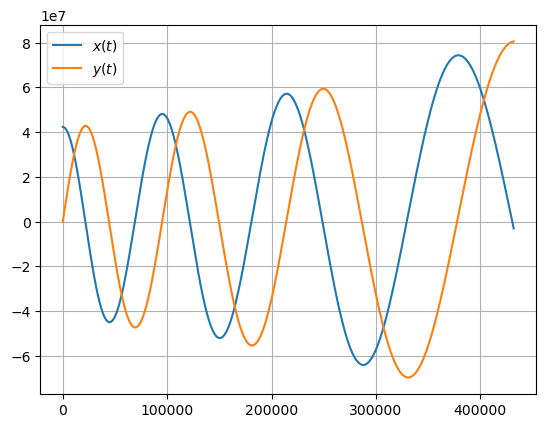

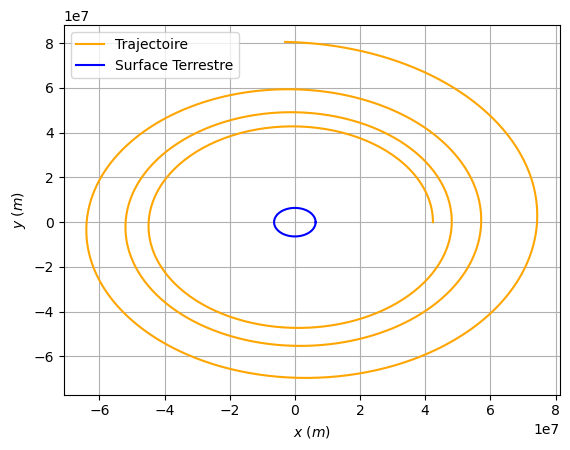

In [ ]:
#Cas où force F constante orthoradiale, vitesse intiale orthoradiale (en orbite géostationnaire) :

#Définition des paramètres de la trajectoire :
h = 36000*10**3  #Hauteur initiale
At = G*Mt 
vi = np.sqrt(G*Mt/(Rt+h))
CI = [Rt+h, 0, 0, vi]
N = 0.002 #Newton (norme de la force constante)

#Définition des force externes :
def fx(x, y, vx, vy, t):
    return N*vx*(1/np.sqrt(vx**2+vy**2)) 
def fy(x, y, vx, vy, t):
    return N*vy*(1/np.sqrt(vx**2+vy**2))

#Calcul de la trajectoire :
ForceN_Eloignement = Resolution_Trajectoire( fx, fy, CI, T = 5*24*3600,A=At, RayonPlaneteOrbite=Rt )

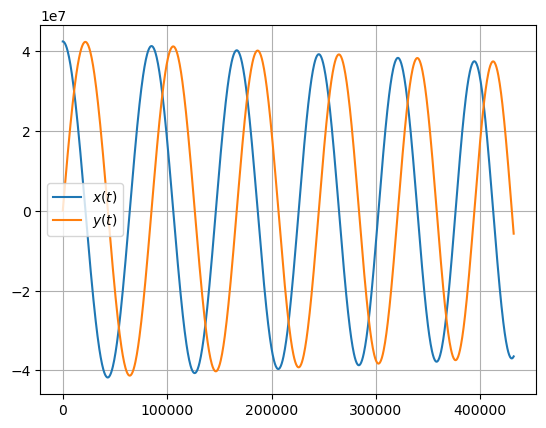

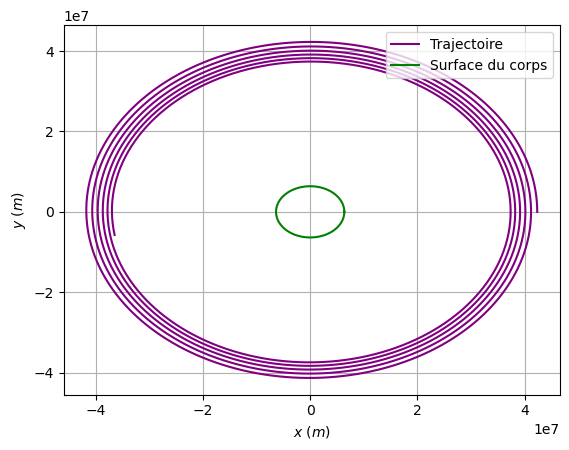

In [126]:
#Cas où force F constante orthoradiale, vitesse intiale orthoradiale (en orbite géostationnaire) :

#Définition des paramètres de la trajectoire :
h = 36000*10**3  #Hauteur initiale
At = G*Mt 
vi = np.sqrt(G*Mt/(Rt+h))
CI = [Rt+h, 0, 0, vi]
N = 0.0005 #Newton (norme de la force constante)

#Définition des force externes :
def fx(x, y, vx, vy, t):
    return -N*vx*(1/np.sqrt(vx**2+vy**2))
def fy(x, y, vx, vy, t):
    return -N*vy*(1/np.sqrt(vx**2+vy**2))

#Calcul de la trajectoire :
ForceN_Rapprochement = Resolution_Trajectoire( fx, fy, CI, T = 5*24*3600,A=At, RayonPlaneteOrbite=Rt)

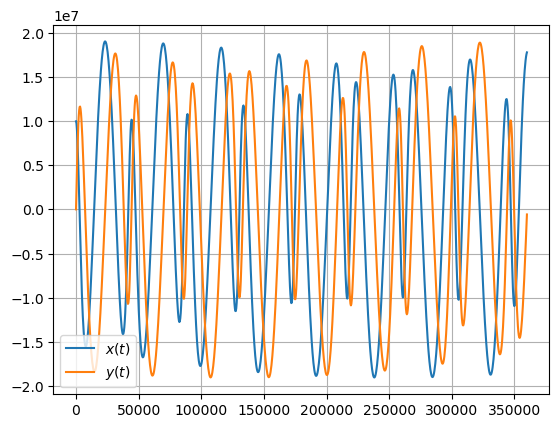

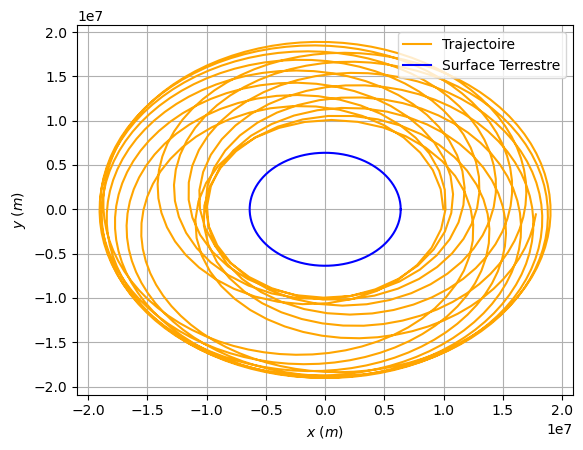

In [16]:
#Cas où force F constante radiale, vitesse intiale orthoradiale (en orbite géostationnaire) :

#Définition des paramètres de la trajectoire :
h = 3600*10**3  #Hauteur initiale
At = G*Mt 
vi = np.sqrt(G*Mt/(Rt+h))
CI = [Rt+h, 0, 0, vi]
N = 0.5 #Newton (norme de la force constante)

#Définition des force externes :
def fx(x, y, vx, vy, t):
    return N*x*(1/np.sqrt(x**2+y**2))
def fy(x, y, vx, vy, t):
    return N*y*(1/np.sqrt(x**2+y**2))
#Calcul de la trajectoire :
ForceRadiale = Resolution_Trajectoire(At, Rt, fx, fy, CI, T = 100*3600)

##  Effet de la pression de radiation seule.

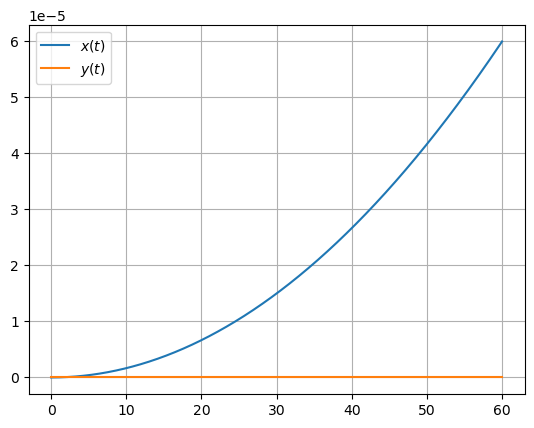

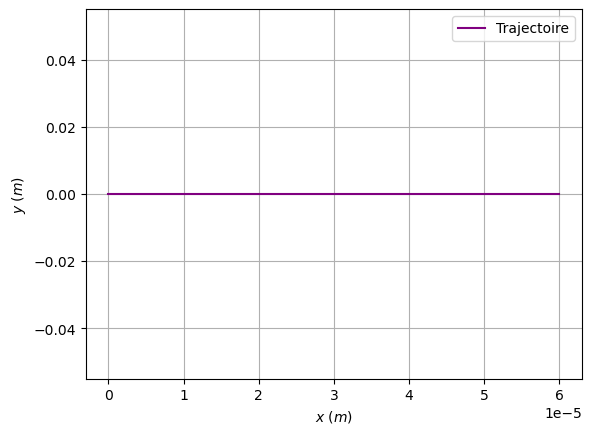

In [129]:
#Voile dans l'espace profond :
#Angle d'inclinaison :
phi = 0 #Rad
Surface = 1000 #m^2
m = 10 #kg
CI = [0, 0, 0, 0]
Asiderale = 0
I0 = 5
#Définition des force externes :
def fx(x, y, vx, vy, t):
    return (2*np.cos(phi)**2)*(I0/c)
def fy(x, y, vx, vy, t):
    return 0
#Calcul de la trajectoire :
VideSideral = Resolution_Trajectoire( fx, fy, CI, T = 60, A=0, RayonPlaneteOrbite=0)

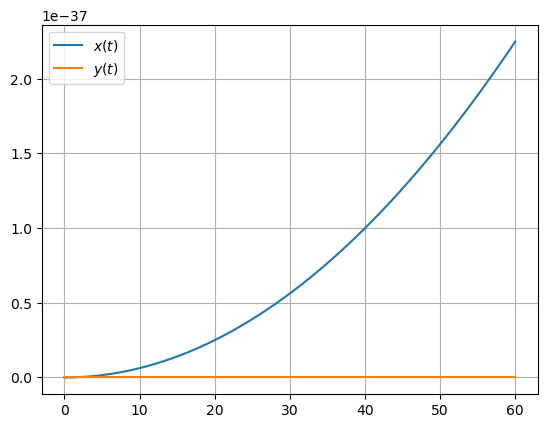

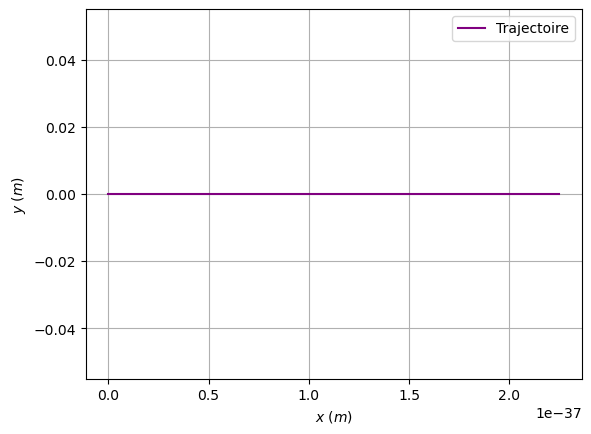

In [130]:
#Voile dans l'espace profond :
#Angle d'inclinaison :
phi = np.pi/2 #Rad
Surface = 1000 #m^2
m = 10 #kg
CI = [0, 0, 0, 0]
Asiderale = 0
I0 = 5
#Définition des force externes :
def fx(x, y, vx, vy, t):
    return (2*np.cos(phi)**2)*(I0/c)
def fy(x, y, vx, vy, t):
    return 0
#Calcul de la trajectoire :
VideSideralAngle = Resolution_Trajectoire( fx, fy, CI, T = 60)


# Voile solaire en orbite

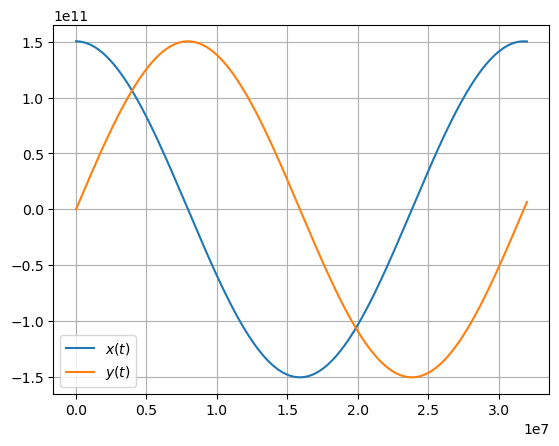

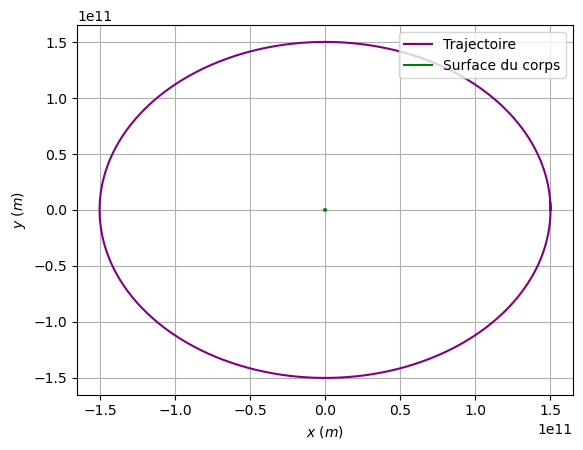

Période T =  31711711.711711712 s, soit  528528.5285285285 min ou encore  8808.80880880881 heures


In [131]:
#Cas où (fx, fy)=(0, 0), rotation autour du Soleil vitesse intiale orthoradiale :
#(On supposera la voile en x=h+Rs à t=0, et donc vi selon uy)

#Définition des paramètres de la trajectoire :
h = UA  #Hauteur initiale
As = G*Ms 
vi = np.sqrt(G*Ms/(Rs+h))
CI = [Rs+UA, 0, 0, vi]

#Définition des force externes :
def fx(x, y, vx, vy, t):
    return 0
def fy(x, y, vx, vy, t):
    return 0

#Calcul de la trajectoire :
Circulaire_Soleil = Resolution_Trajectoire( fx, fy,CI,T=32000000, A=As, RayonPlaneteOrbite=Rs,  periode = True)

phi= 0.0


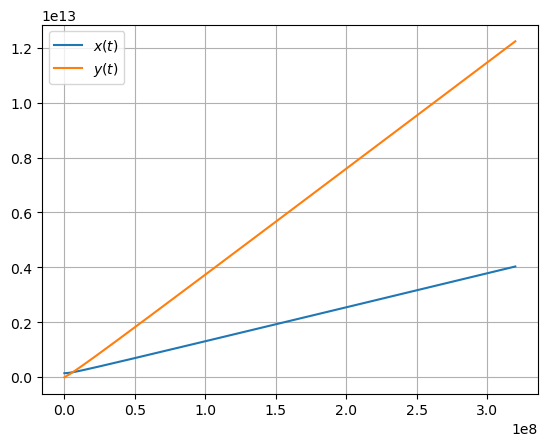

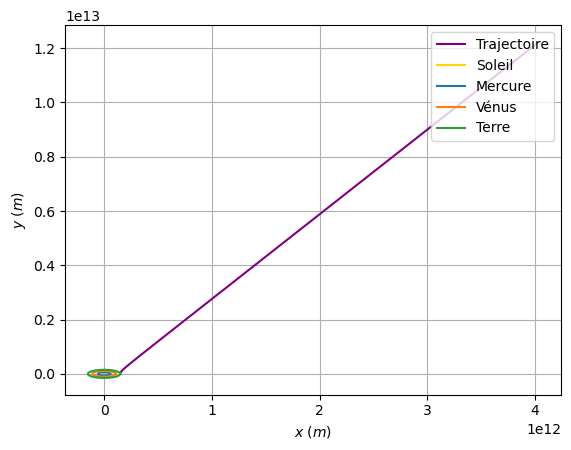

phi= 0.20943951023931953


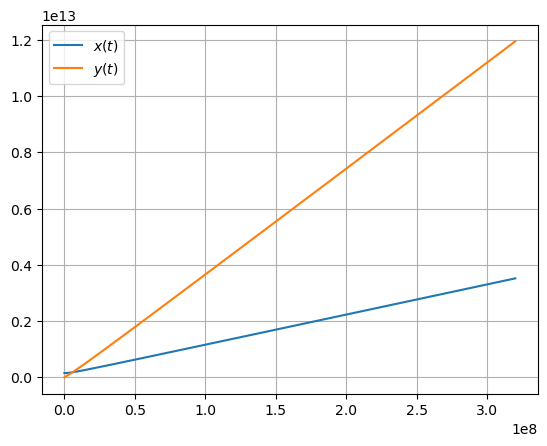

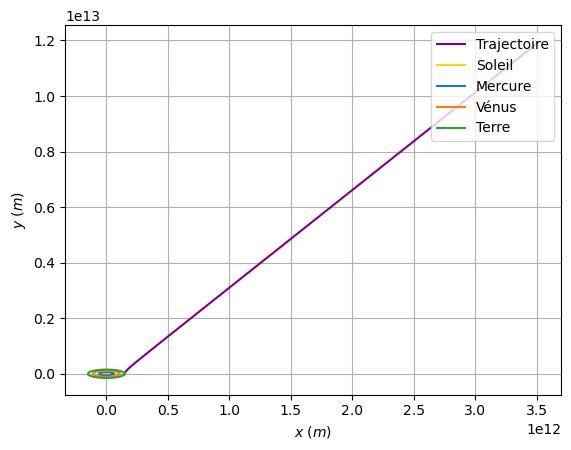

phi= 0.41887902047863906


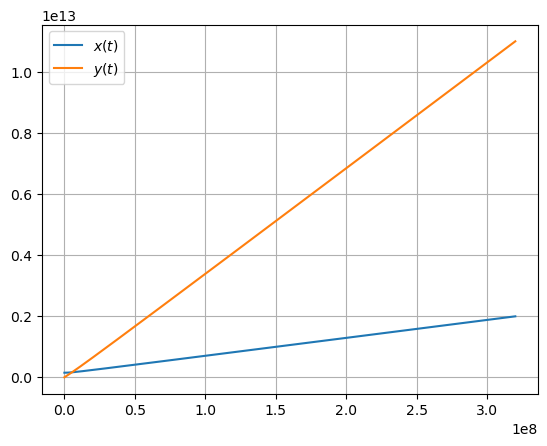

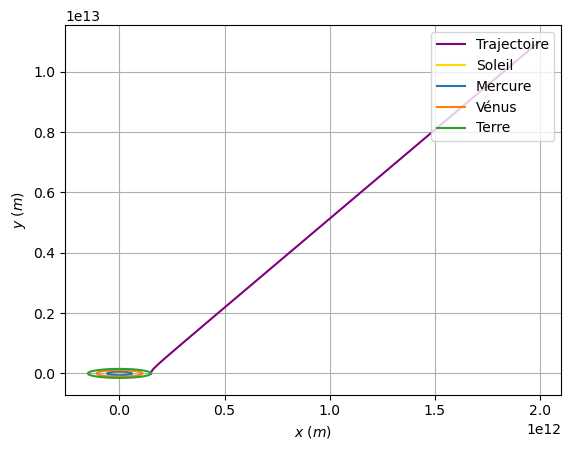

phi= 0.6283185307179586


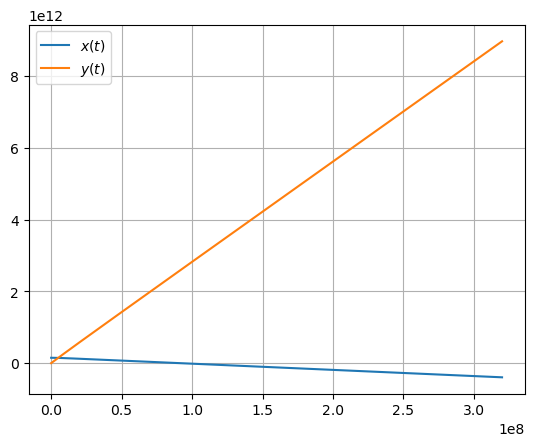

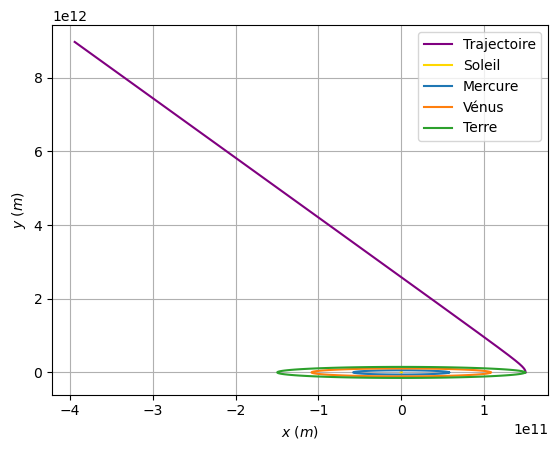

phi= 0.8377580409572781


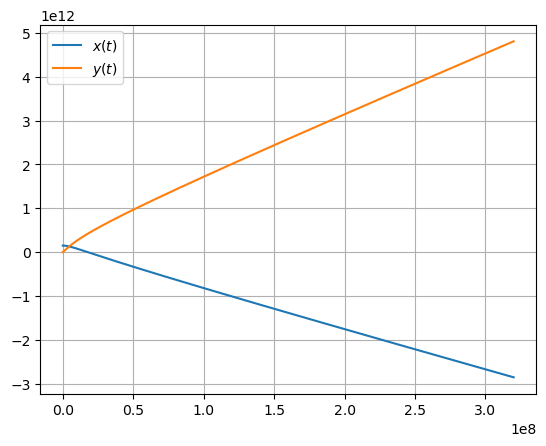

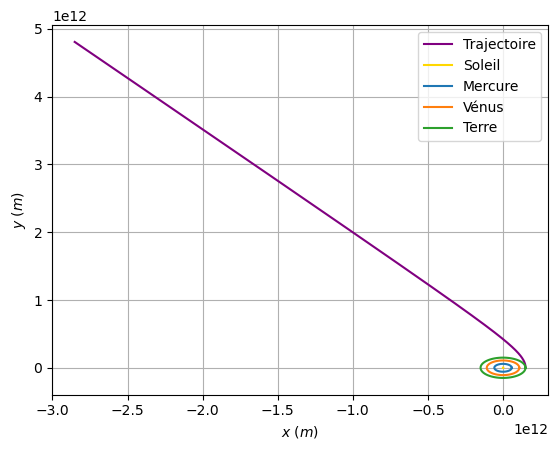

phi= 1.0471975511965976


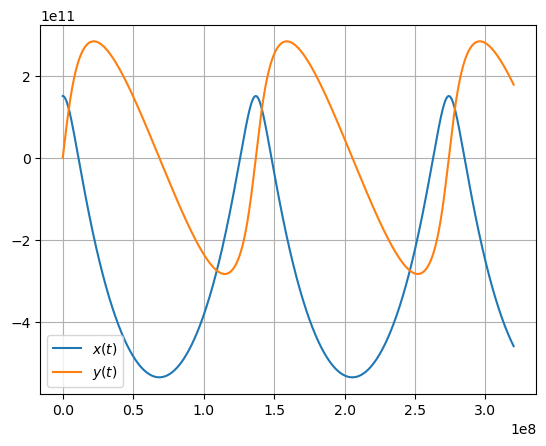

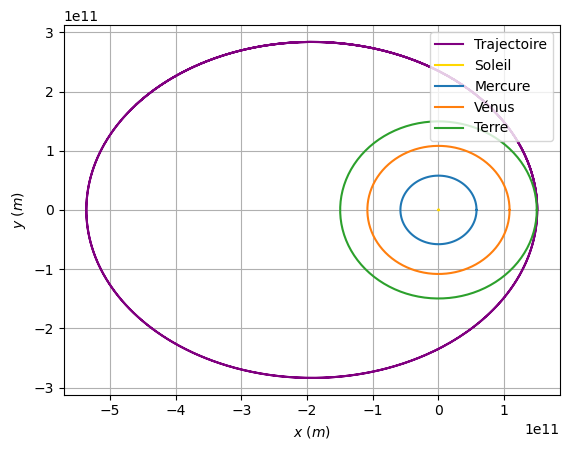

phi= 1.2566370614359172


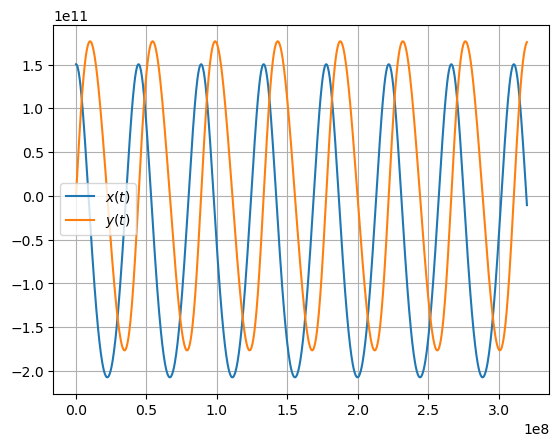

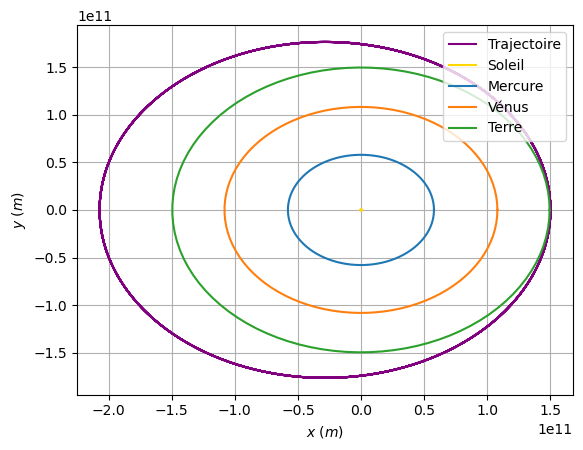

phi= 1.4660765716752369


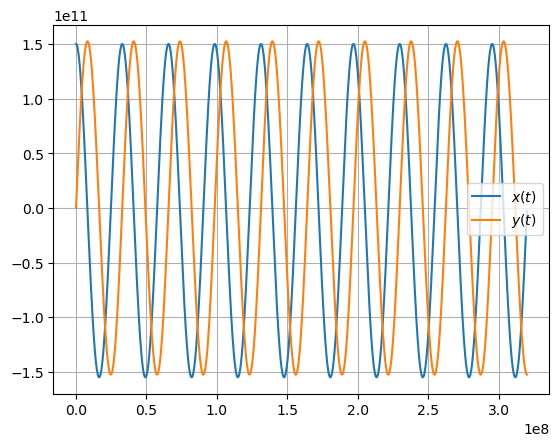

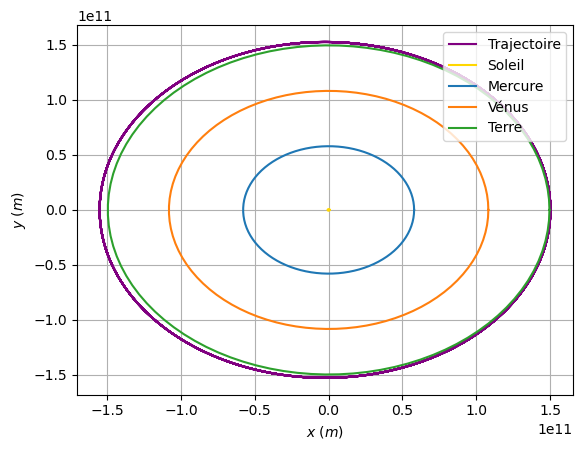

phi= 1.6755160819145563


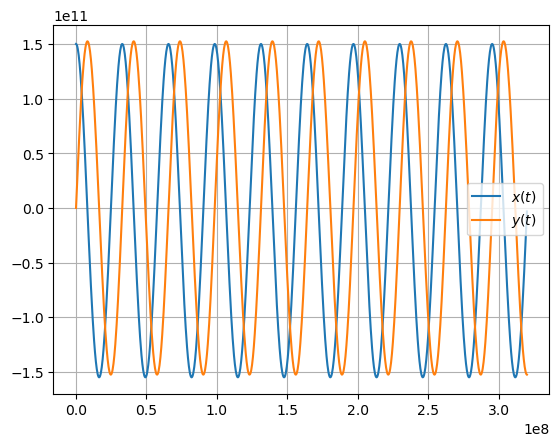

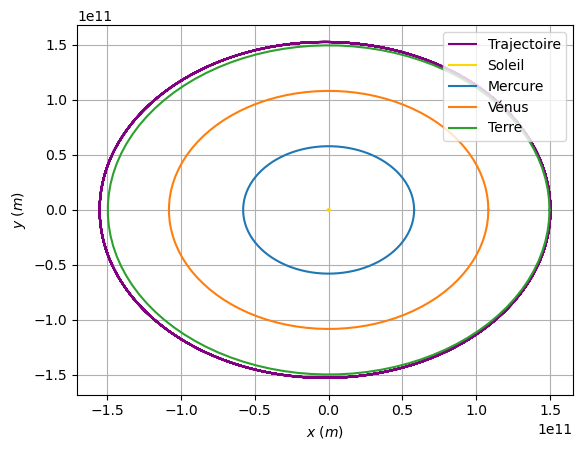

phi= 1.8849555921538759


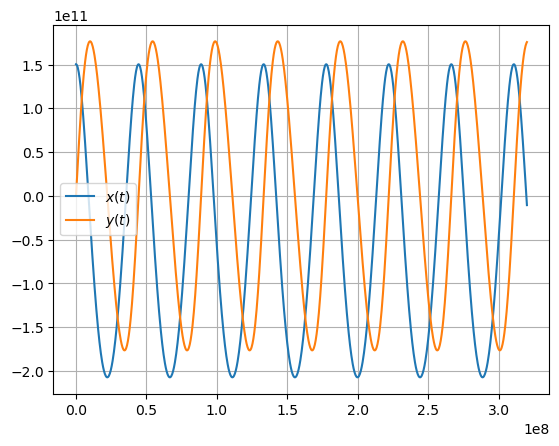

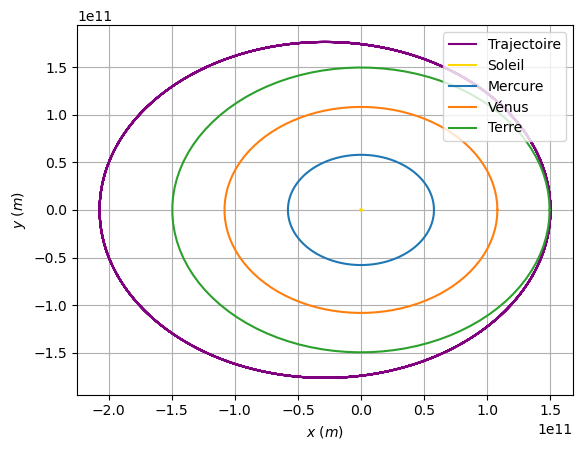

phi= 2.0943951023931953


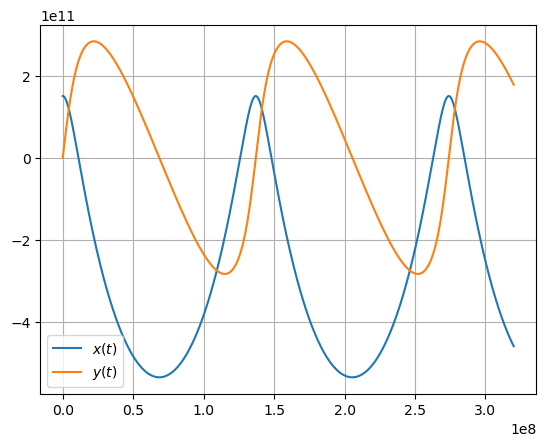

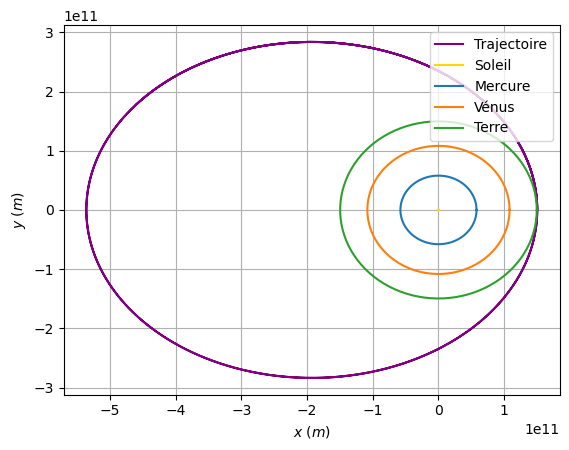

phi= 2.3038346126325147


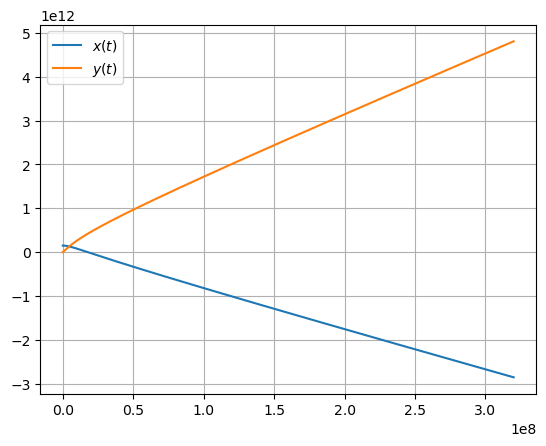

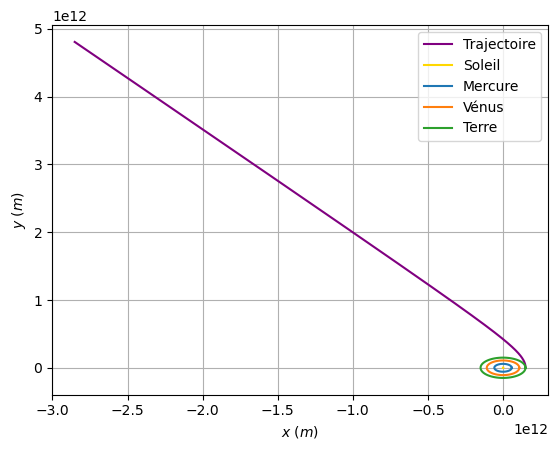

phi= 2.5132741228718345


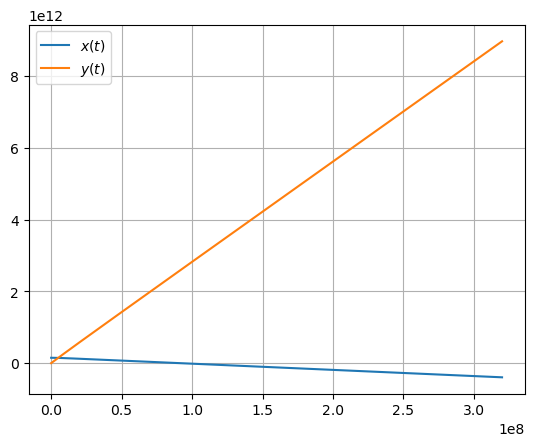

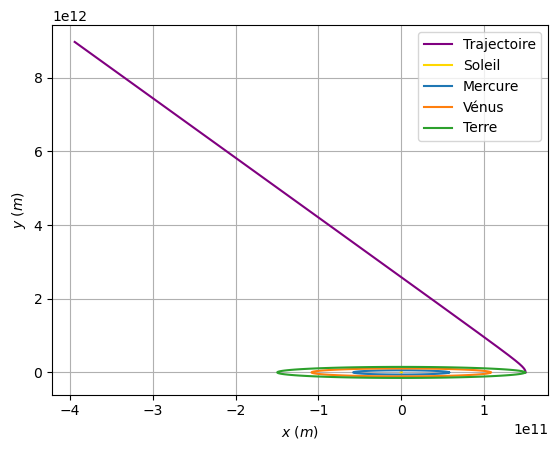

phi= 2.7227136331111543


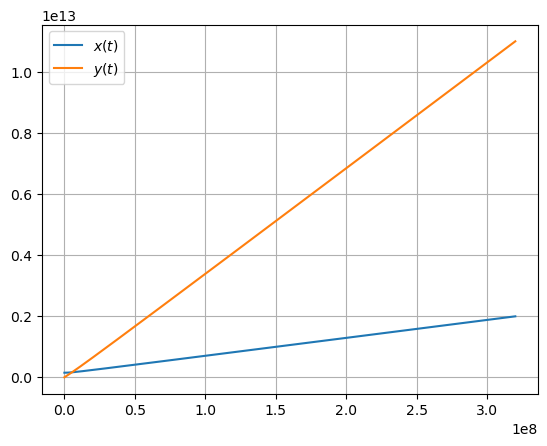

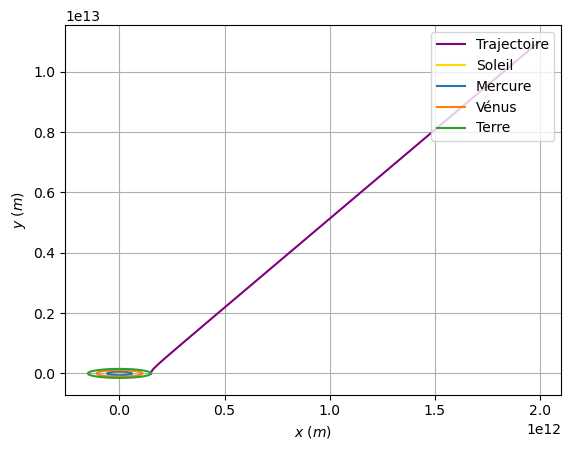

phi= 2.9321531433504737


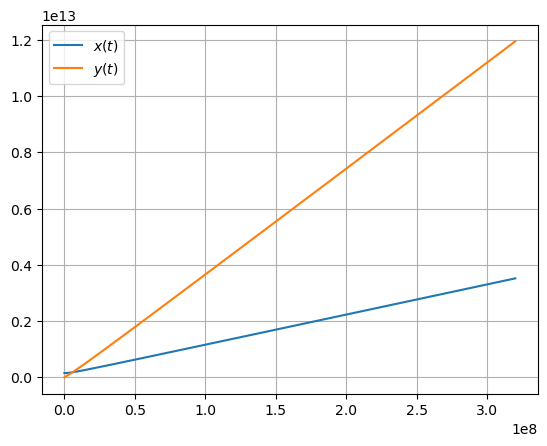

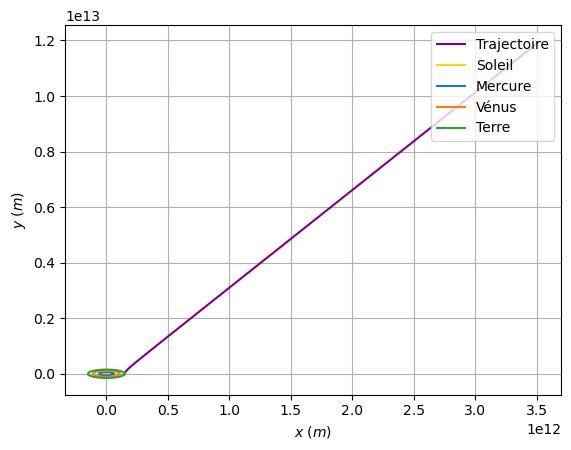

In [137]:
#Voile à une UA du soleil avec une intensité lumineuse :
#Angle d'inclinaison :
k = 15#nomobre d'exemple
phi = np.arange(0,k,1)*np.pi/k #Rad
Surface = 1000 #m^2
m = 10 #kg
CI = [Rs+UA, 0, 0, vi]
As = G*Ms
r = Rs + UA

for i in phi:
    #Définition des force externes :
    def fx(x, y, vx, vy, t):
        return intensite(Surface,np.sqrt(x**2 + y**2),i)*(x/np.sqrt(x**2 + y**2))
    def fy(x, y, vx, vy, t):
        return intensite(Surface,np.sqrt(x**2 + y**2),i)*(y/np.sqrt(x**2 + y**2))
    #Calcul de la trajectoire :
    print("phi=", i)
    VideSideralAngle = Resolution_Trajectoire( fx, fy, CI, T = 320000000, A=As, RayonPlaneteOrbite=Rs,  systeme_solaire=3)

